In [1]:
import math
import pandas as pd
import numpy as np
import random
import matplotlib 
import matplotlib.pyplot as plt
from copy import deepcopy

%matplotlib inline

In [6]:
def info(label, split, label_split):
    info_label= 0
    info_split= 0

    for i in range(len(label)):
        p =  label[i]/sum(label)
        info_i = -p*math.log2(p)
        info_label += info_i
    print('Info(D)=',info_label)
    
    for j in range(len(split)):
        group_ratio =sum(label_split[j])/sum(split)
        info_split_sub = 0
        for s in range(len(label_split[j])):
            p_split =  label_split[j][s]/split[j]
            print('sub_label', p_split)
            if p_split>0:
                info_s = -p_split*math.log2(p_split)
                info_split_sub += info_s
                
        info_split_sub = group_ratio*info_split_sub
        
        info_split += info_split_sub
    print('Info(D)_class', info_split)
    #info_split = sum(info_split_list)
    return info_label-info_split

In [9]:
label = [6,5]
temp = [6, 5]
label_temp = [[2,4], [4, 1]]
info_temp = info(label, temp, label_temp)
info_temp

Info(D)= 0.9940302114769565
sub_label 0.3333333333333333
sub_label 0.6666666666666666
sub_label 0.8
sub_label 0.2
Info(D)_class 0.8290377707967044


0.1649924406802521

In [10]:
def Gini_index(label, split, label_split):
    gini_label= 1
    gini_split= 0
    
    for i in range(len(label)):
        p2 =  -(label[i]/sum(label))**2 
        gini_label += p2

    for j in range(len(split)):
        p_j=split[j]/sum(split)
        gini_sub = 1
        for s in range(len(label_split[j])):
            p2_split =  -((label_split[j][s]/split[j])**2)
            gini_sub += p2_split
        gini_split += p_j*gini_sub
    
    print(gini_label)
    print(gini_split)
    #info_split = sum(info_split_list)
    return gini_label-gini_split

In [13]:
label = [6,5]
temp = [4, 4, 3]
label_temp = [[3,1], [2, 2], [1, 2]]
Gini_temp = Gini_index(label, temp, label_temp)
Gini_temp

0.49586776859504145
0.4393939393939394


0.056473829201102055

In [153]:
Hospital_label = [5, 5]
split_fever = [7, 3]
fever_sub_old =[[2, 1], [3, 1], [3, 0]]
fever_sub1=[[5,2], [3, 0]]

gini_fever1 = Gini_index(Hospital_label, split_fever, fever_sub1)
gini_fever1

0.5
0.2857142857142857


0.2142857142857143

In [155]:
fever_sub2=[[5,1], [3, 1]]

gini_fever2 = Gini_index(Hospital_label, split_fever, fever_sub2)
gini_fever2

0.5
0.2952380952380952


0.2047619047619048

In [279]:
fever_sub3=[[5,1], [3, 1]]
gini_fever3 = Gini_index(Hospital_label, split_fever, fever_sub2)
gini_fever3

0.5
0.2952380952380952


0.2047619047619048

## Distance Matrix

In [310]:
def euclidean_dist (point1, point2):
    squared_dist = 0
    for i in range(len(point1)):
        squared_dist += (point1[i] - point2[i])**2
    
    dist = math.sqrt(squared_dist)
    return dist

dist_test = euclidean_dist((1,1), (2,2))

In [329]:
data = [[1,5], [3,5],[2,4], [4,4], [3,3], [4,2], [5,2], [6,3], [7,4], [7,5], [8,5], [7,6]]
no_point = [str(i+1) for i in range(12)]
df_point = pd.DataFrame(data, columns = ['x1','x2'], index=no_point)
df_point

,x1,x2
1,1,5
2,3,5
3,2,4
4,4,4
5,3,3
6,4,2
7,5,2
8,6,3
9,7,4
10,7,5


In [330]:
from scipy.spatial import distance_matrix
distances = pd.DataFrame(distance_matrix(df_point.values, df_point.values).round(4), index=df_point.index, columns=df_point.index)
distances

,1,2,3,4,5,6,7,8,9,10,11,12
1,0.0000,2.0000,1.4142,3.1623,2.8284,4.2426,5.0000,5.3852,6.0828,6.0000,7.0000,6.0828
2,2.0000,0.0000,1.4142,1.4142,2.0000,3.1623,3.6056,3.6056,4.1231,4.0000,5.0000,4.1231
3,1.4142,1.4142,0.0000,2.0000,1.4142,2.8284,3.6056,4.1231,5.0000,5.0990,6.0828,5.3852
4,3.1623,1.4142,2.0000,0.0000,1.4142,2.0000,2.2361,2.2361,3.0000,3.1623,4.1231,3.6056
5,2.8284,2.0000,1.4142,1.4142,0.0000,1.4142,2.2361,3.0000,4.1231,4.4721,5.3852,5.0000
6,4.2426,3.1623,2.8284,2.0000,1.4142,0.0000,1.0000,2.2361,3.6056,4.2426,5.0000,5.0000
7,5.0000,3.6056,3.6056,2.2361,2.2361,1.0000,0.0000,1.4142,2.8284,3.6056,4.2426,4.4721
8,5.3852,3.6056,4.1231,2.2361,3.0000,2.2361,1.4142,0.0000,1.4142,2.2361,2.8284,3.1623
9,6.0828,4.1231,5.0000,3.0000,4.1231,3.6056,2.8284,1.4142,0.0000,1.0000,1.4142,2.0000
10,6.0000,4.0000,5.0990,3.1623,4.4721,4.2426,3.6056,2.2361,1.0000,0.0000,1.0000,1.0000


In [331]:
distances<1.8

,1,2,3,4,5,6,7,8,9,10,11,12
1,True,False,True,False,False,False,False,False,False,False,False,False
2,False,True,True,True,False,False,False,False,False,False,False,False
3,True,True,True,False,True,False,False,False,False,False,False,False
4,False,True,False,True,True,False,False,False,False,False,False,False
5,False,False,True,True,True,True,False,False,False,False,False,False
6,False,False,False,False,True,True,True,False,False,False,False,False
7,False,False,False,False,False,True,True,True,False,False,False,False
8,False,False,False,False,False,False,True,True,True,False,False,False
9,False,False,False,False,False,False,False,True,True,True,True,False
10,False,False,False,False,False,False,False,False,True,True,True,True


In [15]:
data = [[1,1], [1,3],[1,5], [0,4], [2,4], [3,4], [5,4], [4,3], [4,5]]
no_point = [str(i+1) for i in range(9)]
df_point = pd.DataFrame(data, columns = ['x1','x2'], index=no_point)
df_point

,x1,x2
1,1,1
2,1,3
3,1,5
4,0,4
5,2,4
6,3,4
7,5,4
8,4,3
9,4,5


In [16]:
from scipy.spatial import distance_matrix
distances = pd.DataFrame(distance_matrix(df_point.values, df_point.values).round(4), index=df_point.index, columns=df_point.index)
distances

,1,2,3,4,5,6,7,8,9
1,0.0000,2.0000,4.0000,3.1623,3.1623,3.6056,5.0000,3.6056,5.0000
2,2.0000,0.0000,2.0000,1.4142,1.4142,2.2361,4.1231,3.0000,3.6056
3,4.0000,2.0000,0.0000,1.4142,1.4142,2.2361,4.1231,3.6056,3.0000
4,3.1623,1.4142,1.4142,0.0000,2.0000,3.0000,5.0000,4.1231,4.1231
5,3.1623,1.4142,1.4142,2.0000,0.0000,1.0000,3.0000,2.2361,2.2361
6,3.6056,2.2361,2.2361,3.0000,1.0000,0.0000,2.0000,1.4142,1.4142
7,5.0000,4.1231,4.1231,5.0000,3.0000,2.0000,0.0000,1.4142,1.4142
8,3.6056,3.0000,3.6056,4.1231,2.2361,1.4142,1.4142,0.0000,2.0000
9,5.0000,3.6056,3.0000,4.1231,2.2361,1.4142,1.4142,2.0000,0.0000


In [17]:
distances<1.7

,1,2,3,4,5,6,7,8,9
1,True,False,False,False,False,False,False,False,False
2,False,True,False,True,True,False,False,False,False
3,False,False,True,True,True,False,False,False,False
4,False,True,True,True,False,False,False,False,False
5,False,True,True,False,True,True,False,False,False
6,False,False,False,False,True,True,False,True,True
7,False,False,False,False,False,False,True,True,True
8,False,False,False,False,False,True,True,True,False
9,False,False,False,False,False,True,True,False,True



## Implement the K-Means algorithm (K=4) using the Euclidean distance as the distance measure. 

In [114]:
df = pd.read_csv("clustering.data.txt", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
attr1      500 non-null float64
attr2      500 non-null float64
cluster    500 non-null int64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [262]:
df.cluster=df.cluster.astype(str)

0      False
1      False
2      False
3       True
4      False
       ...  
495     True
496    False
497    False
498    False
499     True
Name: cluster, Length: 500, dtype: bool

In [192]:
X_array  = df[["attr1","attr2"]].values
X_data =df[["attr1","attr2"]]
np.mean(X_data, axis=0)

attr1    0.967335
attr2   -3.608414
dtype: float64

In [249]:
def k_means_centroids(data, k):
    #randomly initialize the k centriods
    natt = data.shape[1]
    nobs = data.shape[0]
    
    mean = np.mean(data, axis =0)
    std = np.std(data, axis =0)
    centroids = mean + np.random.randn(k, natt)*std 
    
    old_centroids = np.zeros(centroids.shape)
    new_centroids = deepcopy(centroids)

    clusters_label = np.zeros(nobs)
    distances = np.zeros((nobs,k))
    centroid_diff = np.linalg.norm(new_centroids- old_centroids)
    
    while centroid_diff > 0:
        for i in range(k):
            distances[:, i]= np.linalg.norm(data-new_centroids[i], axis=1)
        clusters_label = np.argmin(distances, axis=1)
        old_centroids = deepcopy(new_centroids)

        for i in range(k):
            new_centroids[i] = np.mean(data[clusters_label==i], axis=0)

        centroid_diff = np.linalg.norm(new_centroids- old_centroids)
        
    return new_centroids,clusters_label     

In [258]:
np.random.seed(555)
k_means_out= k_means_centroids(X_array, 4)
#mask = centroids > 0
new_cluster = k_means_out[1]
new_cluster

array([1, 3, 2, 0, 1, 3, 0, 2, 2, 0, 3, 3, 1, 2, 3, 3, 3, 2, 0, 2, 3, 1,
       1, 2, 0, 2, 2, 1, 1, 1, 2, 3, 1, 0, 1, 3, 1, 0, 3, 2, 0, 2, 3, 2,
       1, 0, 1, 0, 3, 3, 0, 2, 2, 0, 3, 1, 0, 2, 2, 2, 3, 0, 2, 0, 2, 3,
       2, 1, 3, 0, 3, 3, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 3, 3, 3, 0, 3,
       2, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 3, 2, 2, 2, 3, 2, 1, 3, 2, 0,
       2, 0, 3, 0, 2, 3, 1, 1, 1, 1, 0, 0, 2, 2, 3, 2, 0, 1, 0, 3, 2, 0,
       2, 3, 2, 2, 3, 0, 0, 2, 0, 1, 3, 0, 1, 1, 2, 1, 1, 1, 1, 0, 2, 3,
       3, 1, 0, 1, 2, 2, 1, 3, 3, 1, 0, 2, 0, 1, 3, 3, 3, 2, 3, 3, 2, 2,
       2, 2, 3, 3, 3, 1, 1, 3, 0, 1, 2, 1, 2, 0, 3, 0, 2, 0, 1, 2, 2, 3,
       1, 3, 2, 1, 1, 3, 2, 0, 3, 0, 1, 1, 2, 1, 2, 2, 2, 3, 1, 3, 1, 0,
       3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 2, 2, 3, 3, 2, 1, 0, 2, 3, 0, 2, 1,
       1, 1, 3, 1, 1, 0, 1, 3, 0, 1, 3, 0, 3, 0, 2, 3, 0, 3, 3, 0, 2, 0,
       0, 2, 2, 0, 3, 2, 1, 0, 1, 1, 0, 3, 1, 2, 2, 3, 0, 3, 0, 2, 0, 1,
       3, 3, 3, 0, 1, 1, 2, 3, 1, 0, 1, 0, 1, 1, 3,

In [272]:
new_cluster = new_cluster.astype(str)
label_map = dict(zip(new_cluster[:4], df.cluster[:4]))


In [273]:
label_map

{'1': '0', '3': '3', '2': '2', '0': '1'}

In [280]:
#df['predict_cluster'] = new_cluster
#df['predict_cluster'] = df['kmeans_cluster'].map(label_map)
df

,attr1,attr2,cluster,kmeans_cluster
0,-6.428571,-7.784725,0,0
1,1.138598,1.839405,3,3
2,0.285980,-3.313499,2,2
3,5.082734,-3.334183,1,1
4,0.854200,-10.567261,0,0
...,...,...,...,...
495,6.801513,-4.724746,1,1
496,1.605694,-4.317907,2,2
497,1.107768,4.773266,3,3
498,-1.075868,-7.556290,0,0


## visualize the data such that each cluster is highlighted in a different color

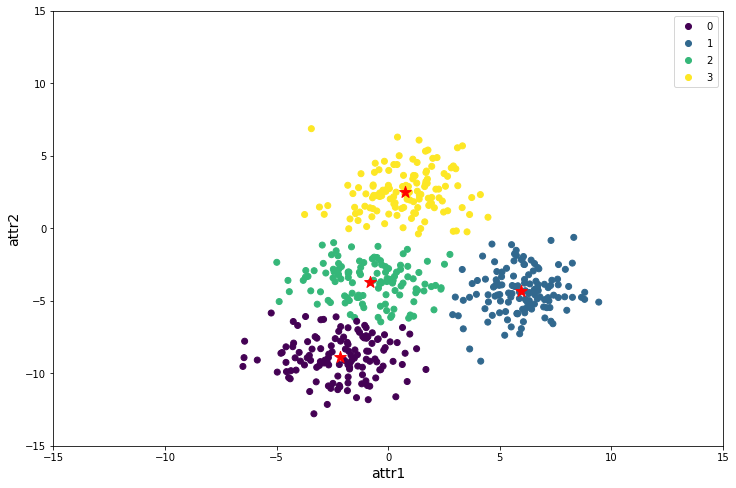

In [335]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.ticklabel_format(style='plain')
ax.set_xlabel('attr1', size=14)
ax.set_ylabel('attr2', size=14)
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

CAX = ax.scatter(df.attr1, df.attr2, c=df.kmeans_cluster.astype(int))
ax.legend(*CAX.legend_elements())

new_centroids = k_means_out[0]

plt.scatter(new_centroids[:,0], new_centroids[:,1], marker='*', c='r', s=150)
plt.show()

## Report 1) the estimated centroids of the 4 estimated clusters and 2) the precision of each estimated cluster.

### 1) the estimated centroids 

In [336]:
estimated_centroids = k_means_out[0]
estimated_centroids

array([[ 5.97283613, -4.34218705],
       [-2.14263325, -8.86360827],
       [-0.82676948, -3.67801796],
       [ 0.76325238,  2.48660301]])

### 2) the precision of each estimated cluster

In [337]:
confustion_matrix = pd.crosstab(df.cluster, df.kmeans_cluster, rownames = ['Actual'], colnames = ['Estimated'])
confustion_matrix

Estimated,0,1,2,3
Actual,,,,
0,119,1,5,0
1,0,124,0,1
2,9,2,111,3
3,0,0,2,123


In [338]:
def precision(confustion_matrix, cluter):
    TP = confustion_matrix[cluter][cluter]
    TP_FP = confustion_matrix[cluter].sum()
    return round(TP/TP_FP, 2)

In [339]:
for i in range(4):
    cluster = str(i)
    precision_i = precision(confustion_matrix, cluster)
    print('The precision rate of cluster',i, 'is', precision_i)

The precision rate of cluster 0 is 0.93
The precision rate of cluster 1 is 0.98
The precision rate of cluster 2 is 0.94
The precision rate of cluster 3 is 0.97


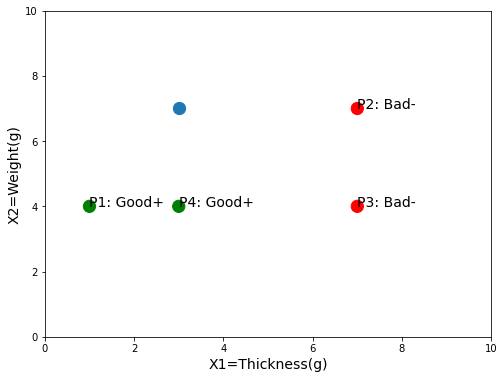

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.ticklabel_format(style='plain')
ax.set_xlabel('X1=Thickness(g)', size=14)
ax.set_ylabel('X2=Weight(g)', size=14)
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

X1=[1, 7, 7, 3]
X2=[4, 7, 4, 4]
label = ['P1: Good+', 'P2: Bad-', 'P3: Bad-', 'P4: Good+']
CAX = ax.scatter(X1, X2, c=['g', 'r','r','g'], s=150)

for i, txt in enumerate(label):
    ax.annotate(txt, (X1[i], X2[i]), size =14)
plt.scatter(3, 7,s=150)
plt.show()